In [8]:
# -*- coding: utf-8 -*-
"""Cleaned ESA, NB, SVM, ANN, and RNN Code for Colab"""

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences


# Define dataset
data = {
    'text': [
        "The sky is blue.",
        "The sun is bright.",
        "The grass is green.",
        "Rain makes the soil fertile.",
        "The storm is dangerous."
    ],
    'label': [1, 1, 1, 0, 0]  # 1: Positive, 0: Negative
}

df = pd.DataFrame(data)

# Text vectorization using TF-IDF
X = df['text']
y = df['label']
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

# Prepare data for ANN
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Artificial Neural Network (ANN)
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_dim=X_train_dense.shape[1]))  # Input layer
ann_model.add(Dense(32, activation='relu'))  # Hidden layer
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_dense, y_train, epochs=5, batch_size=2, verbose=1)
ann_predictions = (ann_model.predict(X_test_dense) > 0.5).astype(int)
print("ANN Accuracy:", accuracy_score(y_test, ann_predictions))
print("ANN Classification Report:\n", classification_report(y_test, ann_predictions))

# Prepare data for RNN
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, maxlen=50)

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Recurrent Neural Network (RNN)
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=64, input_length=50))
rnn_model.add(Bidirectional(LSTM(64)))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=2, verbose=1)
rnn_predictions = (rnn_model.predict(X_test_seq) > 0.5).astype(int)
print("RNN Accuracy:", accuracy_score(y_test_seq, rnn_predictions))
print("RNN Classification Report:\n", classification_report(y_test_seq, rnn_predictions))


Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

SVM Accuracy: 1.0
SVM Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3333 - loss: 0.7030
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6667 - loss: 0.6895
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 0.6829 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.6783 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.6632 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
ANN Accuracy: 1.0
ANN Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.6667 - loss: 0.7043
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.6942
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3333 - loss: 0.7057
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6667 - loss: 0.6840
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 0.6879


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
RNN Accuracy: 0.0
RNN Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())



Missing Values:
 {"@context":{"@language":"en"                                                                                                                                                                                                                                                                                                                                                                                     0
@vocab:"https://schema.org/"                                                                                                                                                                                                                                                                                                                                                                                      0
citeAs:"cr:citeAs"                                                                                                                                                             

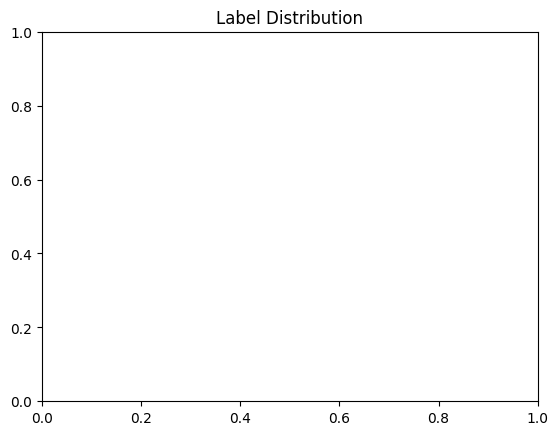

In [ ]:

plt.title('Label Distribution')
plt.show()


In [ ]:
#EDA Analysis

In [ ]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
{"@context":{"@language":"en"                                                                                                                                                                                                                                                                                                                                                                                     0
@vocab:"https://schema.org/"                                                                                                                                                                                                                                                                                                                                                                                      0
citeAs:"cr:citeAs"                                                                                                                                               

In [ ]:
df = df.dropna()
print("Dataset Shape After Dropping Missing Values:", df.shape)

Dataset Shape After Dropping Missing Values: (0, 148)


In [ ]:
#navie bayes

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data = {
    'text': [
        "The sky is blue.",
        "The sun is bright.",
        "The grass is green.",
        "Rain makes the soil fertile.",
        "The storm is dangerous."
    ],
    'label': [1, 1, 1, 0, 0]  # 1: Positive, 0: Negative
}

df = pd.DataFrame(data)


In [ ]:
X = df['text']
y = df['label']

In [ ]:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(16, activation='relu', input_dim=X_train_dense.shape[1]))
ann_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_dense, y_train, epochs=5, batch_size=2, verbose=1)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3333 - loss: 0.7022  
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.6536 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6667 - loss: 0.6653 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6667 - loss: 0.6885
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8333 - loss: 0.6339


In [ ]:
ann_predictions = (ann_model.predict(X_test_dense) > 0.5).astype(int)
print("Dense Neural Network Accuracy:", accuracy_score(y_test, ann_predictions))
print("Dense Neural Network Classification Report:\n", classification_report(y_test, ann_predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Dense Neural Network Accuracy: 1.0
Dense Neural Network Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
#svm algorithm

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
data = {
    'text': [
        "The sky is blue.",
        "The sun is bright.",
        "The grass is green.",
        "Rain makes the soil fertile.",
        "The storm is dangerous."
    ],
    'label': [1, 1, 1, 0, 0]  # 1: Positive, 0: Negative
}

df = pd.DataFrame(data)

In [ ]:
X = df['text']
y = df['label']

In [ ]:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 1.0
SVM Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()


In [ ]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()


In [ ]:
ann_model = Sequential()
ann_model.add(Dense(16, activation='relu', input_dim=X_train_dense.shape[1]))
ann_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ann_predictions = (ann_model.predict(X_test_dense) > 0.5).astype(int)
print("Dense Neural Network Accuracy:", accuracy_score(y_test, ann_predictions))
print("Dense Neural Network Classification Report:\n", classification_report(y_test, ann_predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Dense Neural Network Accuracy: 0.0
Dense Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
#ANN Algorithm

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data = {
    'text': [
        "The sky is blue.",
        "The sun is bright.",
        "The grass is green.",
        "Rain makes the soil fertile.",
        "The storm is dangerous."
    ],
    'label': [1, 1, 1, 0, 0]  # 1: Positive, 0: Negative
}

df = pd.DataFrame(data)


In [ ]:
X = df['text']
y = df['label']


In [ ]:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_dense.shape[1]))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_dense, y_train, epochs=5, batch_size=2, verbose=1)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0000e+00 - loss: 0.7081
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3333 - loss: 0.6993     
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6667 - loss: 0.6852 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.6669
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.6570


In [ ]:
ann_predictions = (model.predict(X_test_dense) > 0.5).astype(int)
print("ANN Accuracy:", accuracy_score(y_test, ann_predictions))
print("ANN Classification Report:\n", classification_report(y_test, ann_predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
ANN Accuracy: 0.0
ANN Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
#RNN Algorithm

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [ ]:
data = {
    'text': [
        "The sky is blue.",
        "The sun is bright.",
        "The grass is green.",
        "Rain makes the soil fertile.",
        "The storm is dangerous."
    ],
    'label': [1, 1, 1, 0, 0]  # 1: Positive, 0: Negative
}

df = pd.DataFrame(data)


In [ ]:
X = df['text']
y = df['label']

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=50))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=1)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.0000e+00 - loss: 0.7111
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6667 - loss: 0.6898
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6667 - loss: 0.6855 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3333 - loss: 0.7078     
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - loss: 0.6934
